In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
os.listdir()

['t-SNE of MNIST.ipynb', 'train.csv', '.ipynb_checkpoints']

In [6]:
data=pd.read_csv('train.csv')

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
label=data['label']
data=data.drop('label',axis=1)

In [9]:
print(label.shape)
print(data.shape)

(42000,)
(42000, 784)


## Data standardisation

In [10]:
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(data)
print('The shape of Column standardised data :',standardised_data.shape)

The shape of Column standardised data : (42000, 784)


## t-SNE

In [11]:

#pick top 1000 values as 42k values consumes time

data_1000=standardised_data[0:1000,:]
label_1000=label[0:1000]
print("Shape of data is ",data_1000.shape," and shape of label is ",label_1000.shape)

Shape of data is  (1000, 784)  and shape of label is  (1000,)


In [15]:
from sklearn.manifold import TSNE

model=TSNE(n_components=2,random_state=0)
#As t-sne is a randomised algorithm we should set the random state to 0 else we would get different results 
#for different iterations
#default values:
#perplexity : 30
#step : 1000

#tsne_data=model.fit_transform(data_1000)

In [10]:
print(tsne_data.T.shape)
print(label_1000.shape)

(2, 1000)
(1000,)


In [11]:
tsne_data=np.vstack((tsne_data.T,label_1000)).T

In [12]:
tsne_data.shape

(1000, 3)

In [13]:
#creating a df 
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim 1","Dim 2","Labels"))

/Users/narasimhajwalapuram/Developer/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


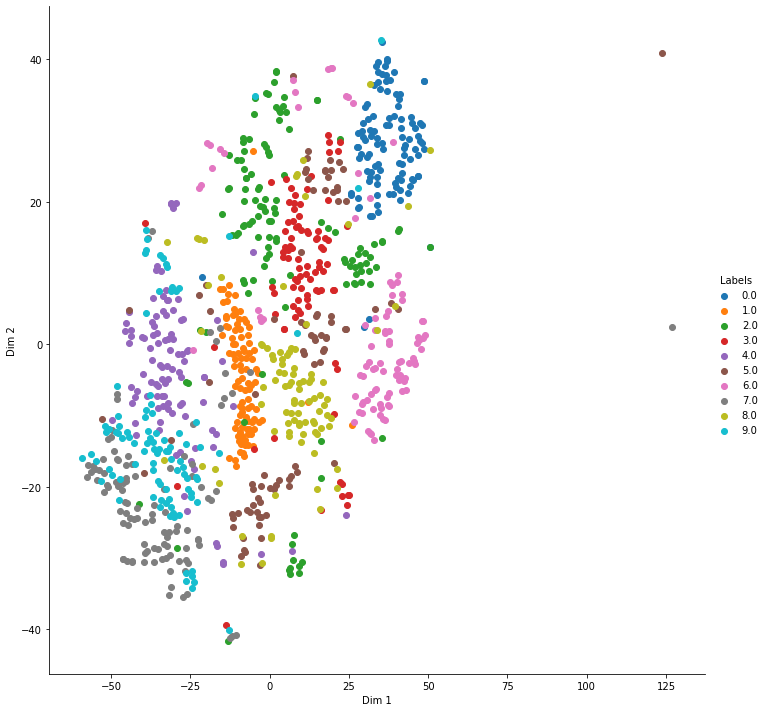

In [14]:
#Plot the dataframe 
import seaborn as sn
sn.FacetGrid(tsne_df,hue="Labels",size=10).map(plt.scatter,'Dim 1','Dim 2').add_legend()
plt.show()

In [15]:
#Update the model 
model=TSNE(n_components=2,perplexity=50,random_state=0)
tsne_data=model.fit_transform(data_1000)


In [16]:
#Create a dataframe
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension_1','Dimension_2','Labels'))

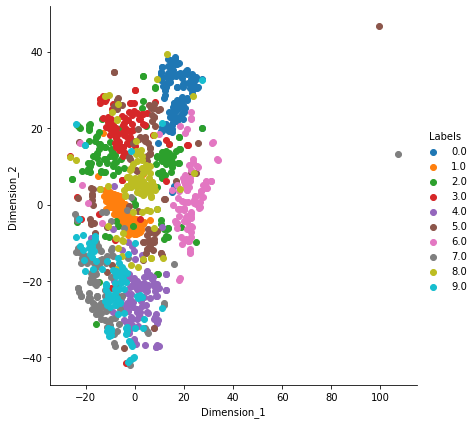

In [17]:
#Plot the data frame 
sn.FacetGrid(tsne_df,hue='Labels',height=6).map(plt.scatter,'Dimension_1','Dimension_2').add_legend()
plt.show()

In [18]:
#Update the no of iterations 
model=TSNE(n_components=2,perplexity=50,n_iter=5000,random_state=0)
tsne_data=model.fit_transform(data_1000)

In [19]:
#create a new dataframe
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim1','Dim2','labels'))

/Users/narasimhajwalapuram/Developer/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


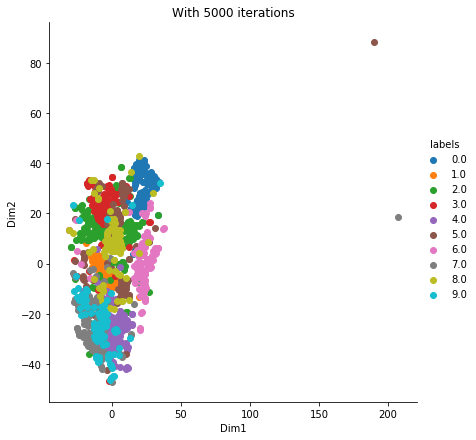

In [20]:
#Plot the result 
sn.FacetGrid(tsne_df,hue='labels',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.title("With 5000 iterations")
plt.show()

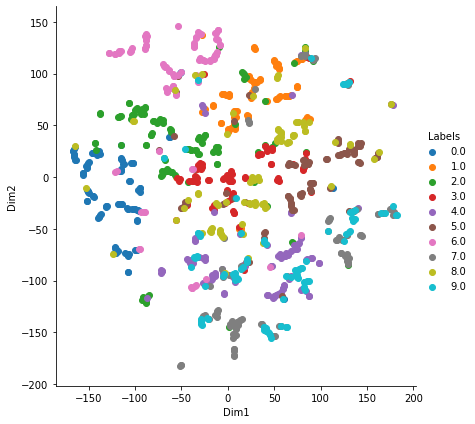

In [21]:
#Update the model 
model=TSNE(n_components=2,n_iter=5000,perplexity=2,random_state=0)
tsne_data=model.fit_transform(data_1000)

#create dataframe
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dim1','Dim2','Labels'))

#Plot it
sn.FacetGrid(tsne_df,hue='Labels',height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()

In [17]:
sample_data=standardised_data
sample_labels=label

In [23]:
print(sample_data.shape)
print(sample_labels.shape)

(42000, 784)
(42000,)


In [24]:
#Model for 42,000 samples 
#model=TSNE(n_components=2,n_iter=5000,perplexity=2,random_state=0)
#tsne_data=model.fit_transform(sample_data)
#print('Shape of the reduced data :',tsne_data.shape)

In [25]:
#create a dataframe
#tsne_data=np.vstack((tsne_data.T,sample_labels)).T
#tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','Label'))

#Plot the data
#sn.FacetGrid(tsne_df,hue='Label',height=10).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
#plt.title("t-SNE Visualization of MNIST Data")
#plt.show()

In [ ]:
#Model for 42,000 samples 
model=TSNE(n_components=2,n_iter=5000,perplexity=50,random_state=0)
tsne_data=model.fit_transform(sample_data)
print('Shape of the reduced data :',tsne_data.shape)

#create a dataframe
tsne_data=np.vstack((tsne_data.T,sample_labels)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension 1','Dimension 2','Label'))

#Plot the data
sn.FacetGrid(tsne_df,hue='Label',height=10).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()
plt.title("t-SNE Visualization of MNIST Data")
plt.show()